In [1]:
# Sample API
import mae6225
mae6225.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

Re   = 100.0
dt   = 0.001
tmax = 10.

# Define cell-centered variable names
center_vars = ['pres', 'divp', 'divc','asol','eror']
face_vars   = ['velc', 'hvar','asol','eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}


# Create the grid and data
gridc = mae6225.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = mae6225.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = mae6225.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

In [3]:
t  = 0.0
nt = 0

ins_stats = dict()

while t <= tmax:
    
    # Calculate predicted velocity: u* = dt*H(u^n)
    if t == 0:
        mae6225.ins.predictor(gridx, gridy, 'velc', 'hvar', Re, dt)
    else:
        mae6225.ins.predictor_AB2(gridx, gridy, 'velc', 'hvar', Re, dt)
    
    # Calculate RHS for the pressure Poission solver div(u)/dt
    mae6225.ins.divergence(gridc, gridx, gridy, 'velc', 'divp', ifac=dt)
    
    # Solve the pressure Poisson equation 
    ins_stats['ites'], ins_stats['res'] = mae6225.poisson.solve_jacobi(gridc, 'pres', 'divp',
                                                                       maxiter=10000, tol=1e-9)
    
    # Calculate corrected velocity u^n+1 = u* - dt * grad(P) 
    mae6225.ins.corrector(gridc, gridx, gridy, 'velc', 'pres', dt)
    
    # Calculate divergence of the corrected velocity to display stats
    mae6225.ins.divergence(gridc, gridx, gridy, 'velc', 'divc')
    
    # Calculate stats
    ins_stats.update(mae6225.ins.stats(gridc, gridx, gridy, 'velc', 'pres', 'divc'))
    
    # Display stats
    if nt % 10 == 0:
        mae6225.io.display_stats(t, ins_stats)   
    
    t += dt
    nt += 1
    

------------ Time = 0.0 ---------------
Number of poisson iterations    : 1
Final poisson residual : 0.0
Max, Min, U   : 2.0, 0.0
Max, Min, V   : 0.0, 0.0
Max, Min, P   : 0.0, 0.0
Max, Min, DIV : 0.0, 0.0


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : 5727
Final poisson residual : 9.993093071036446e-10
Max, Min, U   : 2.0, -0.042044871799454854
Max, Min, V   : 0.12354424199850894, -0.12354424199850894
Max, Min, P   : 1.5696631857215229, -1.5350066055669396
Max, Min, DIV : 8.844344812075633e-09, -8.839559335373226e-09


------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : 5449
Final poisson residual : 9.998826332362645e-10
Max, Min, U   : 2.0, -0.0634665440826805
Max, Min, V   : 0.1876690464106238, -0.1876690464106238
Max, Min, P   : 1.4287001599794809, -1.3354861200700918
Max, Min, DIV : 8.865096212673507e-09, -8.857697078416826e-09


------------ Time = 0.03000000000000002 ---------------
Number of pois

------------ Time = 0.24000000000000019 ---------------
Number of poisson iterations    : 3058
Final poisson residual : 9.997676146360204e-10
Max, Min, U   : 2.0, -0.14099034558784482
Max, Min, V   : 0.32902324015611295, -0.38832423405383365
Max, Min, P   : 1.2340673233950175, -0.7611554031347317
Max, Min, DIV : 9.19920850606104e-09, -8.916848420661289e-09


------------ Time = 0.25000000000000017 ---------------
Number of poisson iterations    : 3017
Final poisson residual : 9.99575100825617e-10
Max, Min, U   : 2.0, -0.14234702119923018
Max, Min, V   : 0.33001350601859, -0.39159058459991875
Max, Min, P   : 1.2365214749534408, -0.7578226431805946
Max, Min, DIV : 9.205034956494274e-09, -8.905644656914463e-09


------------ Time = 0.2600000000000002 ---------------
Number of poisson iterations    : 2978
Final poisson residual : 9.989194473636568e-10
Max, Min, U   : 2.0, -0.1433867787011537
Max, Min, V   : 0.3309053080557101, -0.39457902013298235
Max, Min, P   : 1.238961857022181, -0.7547

------------ Time = 0.47000000000000036 ---------------
Number of poisson iterations    : 2386
Final poisson residual : 9.989247655331575e-10
Max, Min, U   : 2.0, -0.15368355233571848
Max, Min, V   : 0.33873716621760513, -0.43114123202162413
Max, Min, P   : 1.282843365140211, -0.7199996331004143
Max, Min, DIV : 9.199874639875816e-09, -9.121501776121477e-09


------------ Time = 0.48000000000000037 ---------------
Number of poisson iterations    : 2364
Final poisson residual : 9.999046594853668e-10
Max, Min, U   : 2.0, -0.15366294084793464
Max, Min, V   : 0.3388682199060594, -0.43229155928793794
Max, Min, P   : 1.2845511032428147, -0.719120038398756
Max, Min, DIV : 9.202572925914865e-09, -9.155797897619777e-09


------------ Time = 0.4900000000000004 ---------------
Number of poisson iterations    : 2343
Final poisson residual : 9.999473361116266e-10
Max, Min, U   : 2.0, -0.15416258772414335
Max, Min, V   : 0.33898957090922716, -0.43337806696908254
Max, Min, P   : 1.2862269510562387, -0

------------ Time = 0.7000000000000005 ---------------
Number of poisson iterations    : 1966
Final poisson residual : 9.989790742571803e-10
Max, Min, U   : 2.0, -0.16194569548222332
Max, Min, V   : 0.34022296711944566, -0.4467057246141787
Max, Min, P   : 1.3150552407249925, -0.7066751769537415
Max, Min, DIV : 8.897174552657816e-09, -9.786768728758943e-09


------------ Time = 0.7100000000000005 ---------------
Number of poisson iterations    : 1950
Final poisson residual : 9.990429666406707e-10
Max, Min, U   : 2.0, -0.16198503752836246
Max, Min, V   : 0.3402461456178343, -0.4470542748640979
Max, Min, P   : 1.3161688145807378, -0.7063191536670622
Max, Min, DIV : 8.876602564100722e-09, -9.819970614444173e-09


------------ Time = 0.7200000000000005 ---------------
Number of poisson iterations    : 1934
Final poisson residual : 9.994768522129922e-10
Max, Min, U   : 2.0, -0.1624106377924813
Max, Min, V   : 0.34026758295541554, -0.4473867174588172
Max, Min, P   : 1.317262374344279, -0.7059

------------ Time = 0.9300000000000007 ---------------
Number of poisson iterations    : 1628
Final poisson residual : 9.994081323363827e-10
Max, Min, U   : 2.0, -0.16887950275372876
Max, Min, V   : 0.3404653603036037, -0.4585912294317036
Max, Min, P   : 1.336245254638387, -0.7008754308400633
Max, Min, DIV : 9.258917051894328e-09, -1.0582244414081288e-08


------------ Time = 0.9400000000000007 ---------------
Number of poisson iterations    : 1614
Final poisson residual : 9.997061295524895e-10
Max, Min, U   : 2.0, -0.16912787556092992
Max, Min, V   : 0.34046755148843766, -0.4590605482621053
Max, Min, P   : 1.336986199520293, -0.7007084148730224
Max, Min, DIV : 9.29561326220088e-09, -1.062160137621504e-08


------------ Time = 0.9500000000000007 ---------------
Number of poisson iterations    : 1601
Final poisson residual : 9.988564899175887e-10
Max, Min, U   : 2.0, -0.16935009133897722
Max, Min, V   : 0.34046937417533063, -0.4595134525809936
Max, Min, P   : 1.3377144274373043, -0.7005

------------ Time = 1.159999999999983 ---------------
Number of poisson iterations    : 1329
Final poisson residual : 9.997346538158438e-10
Max, Min, U   : 2.0, -0.17354399463569717
Max, Min, V   : 0.34045513671321537, -0.46616917744271563
Max, Min, P   : 1.3504496484446458, -0.6980916568793173
Max, Min, DIV : 1.0325432234486315e-08, -1.1372524255648386e-08


------------ Time = 1.169999999999982 ---------------
Number of poisson iterations    : 1317
Final poisson residual : 9.997261934385005e-10
Max, Min, U   : 2.0, -0.17367274360836307
Max, Min, V   : 0.34045304004189264, -0.4663845587043484
Max, Min, P   : 1.3509501807314996, -0.6980101277906947
Max, Min, DIV : 1.0385916790001462e-08, -1.140174710201336e-08


------------ Time = 1.1799999999999808 ---------------
Number of poisson iterations    : 1305
Final poisson residual : 9.993425467251334e-10
Max, Min, U   : 2.0, -0.1737867124267434
Max, Min, V   : 0.3404508815385057, -0.46659311045041235
Max, Min, P   : 1.3514423546771217, -0.

------------ Time = 1.3899999999999577 ---------------
Number of poisson iterations    : 1069
Final poisson residual : 9.987899731557578e-10
Max, Min, U   : 2.0, -0.17638128246321513
Max, Min, V   : 0.34039901833251873, -0.47059706587950095
Max, Min, P   : 1.3600809334168944, -0.6967413494715456
Max, Min, DIV : 1.1920348943822087e-08, -1.1746109862542653e-08


------------ Time = 1.3999999999999566 ---------------
Number of poisson iterations    : 1059
Final poisson residual : 9.985425369657089e-10
Max, Min, U   : 2.0, -0.17647598303486506
Max, Min, V   : 0.3403964917666107, -0.47076050047246987
Max, Min, P   : 1.3604213845159527, -0.6967026104901961
Max, Min, DIV : 1.1991490370556052e-08, -1.1738450211851159e-08


------------ Time = 1.4099999999999555 ---------------
Number of poisson iterations    : 1049
Final poisson residual : 9.985315924603649e-10
Max, Min, U   : 2.0, -0.17656185246658174
Max, Min, V   : 0.3403939753707166, -0.4709193502173184
Max, Min, P   : 1.3607561905622594, 

------------ Time = 1.6199999999999324 ---------------
Number of poisson iterations    : 871
Final poisson residual : 9.99462134106614e-10
Max, Min, U   : 2.0, -0.17700967877969323
Max, Min, V   : 0.34034504654949144, -0.4734048337617701
Max, Min, P   : 1.3666342418352675, -0.6961206395801389
Max, Min, DIV : 1.326886001420946e-08, -1.0882688528113249e-08


------------ Time = 1.6299999999999313 ---------------
Number of poisson iterations    : 865
Final poisson residual : 9.984502849041462e-10
Max, Min, U   : 2.0, -0.1769953991310225
Max, Min, V   : 0.340342948163234, -0.4734908544583591
Max, Min, P   : 1.366865733783429, -0.696103931353176
Max, Min, DIV : 1.3288348052128973e-08, -1.0795233151839057e-08


------------ Time = 1.6399999999999302 ---------------
Number of poisson iterations    : 858
Final poisson residual : 9.985252399508487e-10
Max, Min, U   : 2.0, -0.17697657375191705
Max, Min, V   : 0.3403408729422548, -0.47357454328419185
Max, Min, P   : 1.3670933545918607, -0.6960878

------------ Time = 1.849999999999907 ---------------
Number of poisson iterations    : 748
Final poisson residual : 9.990869762757236e-10
Max, Min, U   : 2.0, -0.17616262089982232
Max, Min, V   : 0.34030264309771413, -0.474892752019727
Max, Min, P   : 1.3710818262296935, -0.695873429152161
Max, Min, DIV : 1.3222072178017269e-08, -9.365765052393726e-09


------------ Time = 1.859999999999906 ---------------
Number of poisson iterations    : 744
Final poisson residual : 9.986050606912401e-10
Max, Min, U   : 2.0, -0.1760939343843036
Max, Min, V   : 0.34030107046100216, -0.47493857367617115
Max, Min, P   : 1.3712384967083564, -0.6958678161877871
Max, Min, DIV : 1.318415164888731e-08, -9.585427562797122e-09


------------ Time = 1.8699999999999048 ---------------
Number of poisson iterations    : 740
Final poisson residual : 9.985885079621028e-10
Max, Min, U   : 2.0, -0.17602361280299625
Max, Min, V   : 0.34029951928978025, -0.474983156236145
Max, Min, P   : 1.3713925113787926, -0.69586252

------------ Time = 2.079999999999882 ---------------
Number of poisson iterations    : 666
Final poisson residual : 9.983604680732359e-10
Max, Min, U   : 2.0, -0.1746354603399457
Max, Min, V   : 0.3402715661677262, -0.4756842415832629
Max, Min, P   : 1.3740847962392544, -0.6958097522409155
Max, Min, DIV : 1.2108449290101908e-08, -1.3465209391938515e-08


------------ Time = 2.089999999999881 ---------------
Number of poisson iterations    : 662
Final poisson residual : 9.995533759984427e-10
Max, Min, U   : 2.0, -0.17455129976599476
Max, Min, V   : 0.34027043825009756, -0.47570849925622677
Max, Min, P   : 1.374190301611907, -0.6958093597496602
Max, Min, DIV : 1.205507196280417e-08, -1.362946022709366e-08


------------ Time = 2.0999999999998797 ---------------
Number of poisson iterations    : 659
Final poisson residual : 9.998635991471015e-10
Max, Min, U   : 2.0, -0.17446600996601164
Max, Min, V   : 0.34026932724123343, -0.47573208704455733
Max, Min, P   : 1.3742940048056813, -0.69580

------------ Time = 2.3099999999998566 ---------------
Number of poisson iterations    : 593
Final poisson residual : 9.993445651198857e-10
Max, Min, U   : 2.0, -0.17250345755676413
Max, Min, V   : 0.34024955081625063, -0.4761003318532112
Max, Min, P   : 1.3761050495173541, -0.6958283464087115
Max, Min, DIV : 1.0642879754146212e-08, -1.592837683972448e-08


------------ Time = 2.3199999999998555 ---------------
Number of poisson iterations    : 590
Final poisson residual : 9.998484594913968e-10
Max, Min, U   : 2.0, -0.17240545092251883
Max, Min, V   : 0.3402487622615725, -0.47611294478201543
Max, Min, P   : 1.3761760123858395, -0.6958300941074138
Max, Min, DIV : 1.0584625504631712e-08, -1.6014906734085343e-08


------------ Time = 2.3299999999998544 ---------------
Number of poisson iterations    : 587
Final poisson residual : 9.994332559820938e-10
Max, Min, U   : 2.0, -0.1723073058921503
Max, Min, V   : 0.3402479862349446, -0.4761251980803001
Max, Min, P   : 1.3762457653174953, -0.695

------------ Time = 2.5399999999998313 ---------------
Number of poisson iterations    : 521
Final poisson residual : 9.981946355211183e-10
Max, Min, U   : 2.0, -0.17025923720346395
Max, Min, V   : 0.3402342919744769, -0.47631475347821184
Max, Min, P   : 1.3774662367778017, -0.6958772232978477
Max, Min, DIV : 9.037955097431633e-09, -1.7458583911889036e-08


------------ Time = 2.54999999999983 ---------------
Number of poisson iterations    : 517
Final poisson residual : 9.996574051353488e-10
Max, Min, U   : 2.0, -0.17016407333347253
Max, Min, V   : 0.34023375074863965, -0.47632117956918607
Max, Min, P   : 1.3775142206393463, -0.6958795840140323
Max, Min, DIV : 8.964385947527603e-09, -1.7553359654698397e-08


------------ Time = 2.559999999999829 ---------------
Number of poisson iterations    : 514
Final poisson residual : 9.988103808549723e-10
Max, Min, U   : 2.0, -0.1700692510936832
Max, Min, V   : 0.3402332184969658, -0.476327417988308
Max, Min, P   : 1.3775614091045336, -0.6958819

------------ Time = 2.769999999999806 ---------------
Number of poisson iterations    : 448
Final poisson residual : 9.99065796495129e-10
Max, Min, U   : 2.0, -0.16817539612095234
Max, Min, V   : 0.3402238892517299, -0.4764235191388942
Max, Min, P   : 1.3783917056472021, -0.6959314766511538
Max, Min, DIV : 7.435290064194966e-09, -1.8592311690213137e-08


------------ Time = 2.779999999999805 ---------------
Number of poisson iterations    : 445
Final poisson residual : 9.986284973541216e-10
Max, Min, U   : 2.0, -0.1680905123577469
Max, Min, V   : 0.34022352309083415, -0.4764267772044705
Max, Min, P   : 1.3784246039191692, -0.6959337600346895
Max, Min, DIV : 7.373339397376277e-09, -1.862449749978623e-08


------------ Time = 2.7899999999998037 ---------------
Number of poisson iterations    : 442
Final poisson residual : 9.97833953896508e-10
Max, Min, U   : 2.0, -0.16800615315205913
Max, Min, V   : 0.34022316319582174, -0.47642994201460875
Max, Min, P   : 1.3784569804738072, -0.69593603

------------ Time = 2.9999999999997806 ---------------
Number of poisson iterations    : 378
Final poisson residual : 9.995051973016255e-10
Max, Min, U   : 2.0, -0.1663985378193991
Max, Min, V   : 0.3402168870035142, -0.47647939932518735
Max, Min, P   : 1.3790320965537992, -0.6959805176379783
Max, Min, DIV : 6.339504754482306e-09, -1.9448824772894113e-08


------------ Time = 3.0099999999997795 ---------------
Number of poisson iterations    : 376
Final poisson residual : 9.976113266421283e-10
Max, Min, U   : 2.0, -0.16633296774936462
Max, Min, V   : 0.3402166419117056, -0.4764811276563831
Max, Min, P   : 1.3790551601767302, -0.6959824625067899
Max, Min, DIV : 6.3009260309332404e-09, -1.942839666924101e-08


------------ Time = 3.0199999999997784 ---------------
Number of poisson iterations    : 373
Final poisson residual : 9.980318077909634e-10
Max, Min, U   : 2.0, -0.16626783446222132
Max, Min, V   : 0.3402164011013066, -0.47648281296340056
Max, Min, P   : 1.3790778798677856, -0.6959

------------ Time = 3.2299999999997553 ---------------
Number of poisson iterations    : 316
Final poisson residual : 9.97433326576944e-10
Max, Min, U   : 2.0, -0.16500182480449616
Max, Min, V   : 0.34021221508723754, -0.47651059052765576
Max, Min, P   : 1.3794866808533957, -0.6960209031229286
Max, Min, DIV : 6.04968020123664e-09, -2.0008570800200687e-08


------------ Time = 3.239999999999754 ---------------
Number of poisson iterations    : 313
Final poisson residual : 9.989559739870214e-10
Max, Min, U   : 2.0, -0.1649463634837232
Max, Min, V   : 0.3402120520769737, -0.4765116428159555
Max, Min, P   : 1.3795033194287234, -0.6960224531731078
Max, Min, DIV : 6.065946495104058e-09, -2.00694856289374e-08


------------ Time = 3.249999999999753 ---------------
Number of poisson iterations    : 310
Final poisson residual : 9.995884864304375e-10
Max, Min, U   : 2.0, -0.16489133385810872
Max, Min, V   : 0.3402118919437841, -0.4765126774201816
Max, Min, P   : 1.37951973610234, -0.696023986557

------------ Time = 3.45999999999973 ---------------
Number of poisson iterations    : 261
Final poisson residual : 9.98901922332083e-10
Max, Min, U   : 2.0, -0.1638323674842824
Max, Min, V   : 0.34020911116389524, -0.47653142080363525
Max, Min, P   : 1.379819582532113, -0.696052463740931
Max, Min, DIV : 6.20858198185914e-09, -2.0468439387855142e-08


------------ Time = 3.469999999999729 ---------------
Number of poisson iterations    : 260
Final poisson residual : 9.97155857903799e-10
Max, Min, U   : 2.0, -0.16378637197318585
Max, Min, V   : 0.3402090029043374, -0.4765322138789209
Max, Min, P   : 1.3798319971718156, -0.6960536512277417
Max, Min, DIV : 6.197949653508061e-09, -2.0436710101989775e-08


------------ Time = 3.4799999999997278 ---------------
Number of poisson iterations    : 257
Final poisson residual : 9.992099051592658e-10
Max, Min, U   : 2.0, -0.16374076198384696
Max, Min, V   : 0.3402088965450288, -0.4765330009936065
Max, Min, P   : 1.3798442569438627, -0.696054823607

------------ Time = 3.6899999999997046 ---------------
Number of poisson iterations    : 217
Final poisson residual : 9.973132320893346e-10
Max, Min, U   : 2.0, -0.16286756486565895
Max, Min, V   : 0.34020704692700726, -0.4765486165600517
Max, Min, P   : 1.380071683290935, -0.6960763218859282
Max, Min, DIV : 6.474941138812085e-09, -2.069691973360932e-08


------------ Time = 3.6999999999997035 ---------------
Number of poisson iterations    : 215
Final poisson residual : 9.982269948096154e-10
Max, Min, U   : 2.0, -0.16282979668107223
Max, Min, V   : 0.34020697473077066, -0.47654933359456647
Max, Min, P   : 1.3800812504868722, -0.6960772068905409
Max, Min, DIV : 6.497647142555962e-09, -2.072716220880011e-08


------------ Time = 3.7099999999997024 ---------------
Number of poisson iterations    : 214
Final poisson residual : 9.965980332712135e-10
Max, Min, U   : 2.0, -0.16279235520873123
Max, Min, V   : 0.3402069037843941, -0.4765500493777977
Max, Min, P   : 1.3800907204696486, -0.69607

------------ Time = 3.9199999999996793 ---------------
Number of poisson iterations    : 181
Final poisson residual : 9.989966961036711e-10
Max, Min, U   : 2.0, -0.16207701768607102
Max, Min, V   : 0.3402056650354771, -0.4765649365359979
Max, Min, P   : 1.3802688369502065, -0.6960939357924368
Max, Min, DIV : 6.739947211453767e-09, -2.0902964692481873e-08


------------ Time = 3.929999999999678 ---------------
Number of poisson iterations    : 180
Final poisson residual : 9.959964914668083e-10
Max, Min, U   : 2.0, -0.16204612000944535
Max, Min, V   : 0.34020561642443065, -0.47656564328641127
Max, Min, P   : 1.380276443276598, -0.696094582206596
Max, Min, DIV : 6.722731260566661e-09, -2.0845082104870016e-08


------------ Time = 3.939999999999677 ---------------
Number of poisson iterations    : 178
Final poisson residual : 9.98382015383138e-10
Max, Min, U   : 2.0, -0.1620154913884573
Max, Min, V   : 0.3402055686238749, -0.4765663500846006
Max, Min, P   : 1.380283974951026, -0.6960952193

------------ Time = 4.149999999999721 ---------------
Number of poisson iterations    : 153
Final poisson residual : 9.99212455922503e-10
Max, Min, U   : 2.0, -0.1614303698988431
Max, Min, V   : 0.3402047287239231, -0.47658121536160303
Max, Min, P   : 1.380427442305269, -0.6961066888199454
Max, Min, DIV : 7.191369222336874e-09, -2.1012244388884938e-08


------------ Time = 4.159999999999724 ---------------
Number of poisson iterations    : 152
Final poisson residual : 9.991825165198463e-10
Max, Min, U   : 2.0, -0.16140508639461254
Max, Min, V   : 0.3402046955033587, -0.47658192384435943
Max, Min, P   : 1.3804336408477482, -0.6961071520358391
Max, Min, DIV : 7.2336620859925205e-09, -2.101362817086283e-08


------------ Time = 4.169999999999727 ---------------
Number of poisson iterations    : 151
Final poisson residual : 9.982732535341442e-10
Max, Min, U   : 2.0, -0.1613800211800934
Max, Min, V   : 0.34020466281560546, -0.4765826322835455
Max, Min, P   : 1.3804397894455236, -0.696107608

------------ Time = 4.379999999999797 ---------------
Number of poisson iterations    : 139
Final poisson residual : 9.998037745492043e-10
Max, Min, U   : 2.0, -0.16090064553089922
Max, Min, V   : 0.3402040835962684, -0.4765974590761705
Max, Min, P   : 1.380558004400657, -0.6961157535839781
Max, Min, DIV : 8.062250311802188e-09, -2.103504037620496e-08


------------ Time = 4.389999999999801 ---------------
Number of poisson iterations    : 229
Final poisson residual : 9.979131419701929e-10
Max, Min, U   : 2.0, -0.16087990113694042
Max, Min, V   : 0.3402040607893002, -0.4765981616437346
Max, Min, P   : 1.3805633147758822, -0.6961160790374897
Max, Min, DIV : 1.4185417840373304e-08, -1.0630763824792666e-08


------------ Time = 4.399999999999804 ---------------
Number of poisson iterations    : 134
Final poisson residual : 9.971315031261136e-10
Max, Min, U   : 2.0, -0.16085933202784
Max, Min, V   : 0.34020403767580587, -0.47659886157592934
Max, Min, P   : 1.3805682712570748, -0.6961164044

------------ Time = 4.609999999999874 ---------------
Number of poisson iterations    : 103
Final poisson residual : 9.985211859434408e-10
Max, Min, U   : 2.0, -0.16046524633722853
Max, Min, V   : 0.34020363042462265, -0.47661339524975754
Max, Min, P   : 1.3806672987712818, -0.6961220289141655
Max, Min, DIV : 1.3889259187216396e-08, -1.2120072365867651e-08


------------ Time = 4.6199999999998775 ---------------
Number of poisson iterations    : 104
Final poisson residual : 9.986035764114693e-10
Max, Min, U   : 2.0, -0.16044815740650625
Max, Min, V   : 0.3402036139019636, -0.47661407610591805
Max, Min, P   : 1.3806716524435387, -0.696122267569693
Max, Min, DIV : 1.3541169296971134e-08, -1.240361413579194e-08


------------ Time = 4.629999999999881 ---------------
Number of poisson iterations    : 124
Final poisson residual : 9.994212098098106e-10
Max, Min, U   : 2.0, -0.1604312098963877
Max, Min, V   : 0.3402035974604503, -0.4766147551194496
Max, Min, P   : 1.3806760917591117, -0.69612

------------ Time = 4.839999999999951 ---------------
Number of poisson iterations    : 100
Final poisson residual : 9.978924304068176e-10
Max, Min, U   : 2.0, -0.16010583473648526
Max, Min, V   : 0.3402033044655976, -0.4766287183859817
Max, Min, P   : 1.3807600851651654, -0.6961262457417071
Max, Min, DIV : 1.2187441611466454e-08, -1.634424151575331e-08


------------ Time = 4.849999999999954 ---------------
Number of poisson iterations    : 104
Final poisson residual : 9.98910267662417e-10
Max, Min, U   : 2.0, -0.16009169336637677
Max, Min, V   : 0.3402032923911128, -0.47662936629493985
Max, Min, P   : 1.380763879180039, -0.6961263501649665
Max, Min, DIV : 9.550180868345137e-09, -2.044447988680531e-08


------------ Time = 4.859999999999958 ---------------
Number of poisson iterations    : 94
Final poisson residual : 9.979692800788224e-10
Max, Min, U   : 2.0, -0.16007766738787166
Max, Min, V   : 0.3402032809319775, -0.47663001409114
Max, Min, P   : 1.3807674737354192, -0.6961265195291

------------ Time = 5.070000000000028 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.975331087148727e-10
Max, Min, U   : 2.0, -0.1598077827776803
Max, Min, V   : 0.3402030657504025, -0.4766431928767794
Max, Min, P   : 1.3808397827314671, -0.696128893578253
Max, Min, DIV : 1.4186281593886463e-08, -1.231815927038582e-08


------------ Time = 5.080000000000031 ---------------
Number of poisson iterations    : 97
Final poisson residual : 9.950532732423456e-10
Max, Min, U   : 2.0, -0.15979602657324973
Max, Min, V   : 0.3402030563558032, -0.47664379865777345
Max, Min, P   : 1.3808428030009177, -0.6961289819833616
Max, Min, DIV : 1.0623552038069306e-08, -1.9324561506550708e-08


------------ Time = 5.0900000000000345 ---------------
Number of poisson iterations    : 100
Final poisson residual : 9.979121603861935e-10
Max, Min, U   : 2.0, -0.15978436353493278
Max, Min, V   : 0.34020304764162046, -0.47664440401963504
Max, Min, P   : 1.3808461577962807, -0.696129

------------ Time = 5.300000000000105 ---------------
Number of poisson iterations    : 88
Final poisson residual : 9.934647006778638e-10
Max, Min, U   : 2.0, -0.15955949846478862
Max, Min, V   : 0.34020288613607436, -0.47665666135649526
Max, Min, P   : 1.3809082401824315, -0.6961304347426135
Max, Min, DIV : 9.730612426928076e-09, -2.084901318255561e-08


------------ Time = 5.310000000000108 ---------------
Number of poisson iterations    : 95
Final poisson residual : 9.988835691636422e-10
Max, Min, U   : 2.0, -0.15954968355641516
Max, Min, V   : 0.34020287985077785, -0.4766572241247012
Max, Min, P   : 1.3809111139757708, -0.6961304610575952
Max, Min, DIV : 1.493379475636658e-08, -1.0492652857685414e-08


------------ Time = 5.320000000000111 ---------------
Number of poisson iterations    : 129
Final poisson residual : 9.992033886988941e-10
Max, Min, U   : 2.0, -0.15953994337493752
Max, Min, V   : 0.3402028729978765, -0.47665778283893073
Max, Min, P   : 1.380914001465968, -0.69613051

------------ Time = 5.530000000000181 ---------------
Number of poisson iterations    : 79
Final poisson residual : 9.974089071633732e-10
Max, Min, U   : 2.0, -0.15935180679383348
Max, Min, V   : 0.34020274962383185, -0.47666905305408713
Max, Min, P   : 1.3809675700627475, -0.6961311411472351
Max, Min, DIV : 1.2554698947120357e-08, -1.5916133745165484e-08


------------ Time = 5.540000000000185 ---------------
Number of poisson iterations    : 250
Final poisson residual : 9.996045406594564e-10
Max, Min, U   : 2.0, -0.15934357879514965
Max, Min, V   : 0.3402027447303818, -0.47666956760436063
Max, Min, P   : 1.3809703531986548, -0.6961311289075531
Max, Min, DIV : 1.4459335395677897e-08, -1.1364306717887018e-08


------------ Time = 5.550000000000188 ---------------
Number of poisson iterations    : 95
Final poisson residual : 9.994301699790168e-10
Max, Min, U   : 2.0, -0.1593354131105871
Max, Min, V   : 0.34020273957127156, -0.4766700792671537
Max, Min, P   : 1.3809725286247994, -0.69613

------------ Time = 5.760000000000258 ---------------
Number of poisson iterations    : 292
Final poisson residual : 9.986786479165927e-10
Max, Min, U   : 2.0, -0.15917741539133465
Max, Min, V   : 0.3402026441701332, -0.4766803488090628
Max, Min, P   : 1.381019537929196, -0.6961311935087434
Max, Min, DIV : 1.3812788690614752e-08, -1.2865516429982904e-08


------------ Time = 5.770000000000262 ---------------
Number of poisson iterations    : 65
Final poisson residual : 9.955557160403548e-10
Max, Min, U   : 2.0, -0.15917049359459928
Max, Min, V   : 0.3402026396925636, -0.47668081389997896
Max, Min, P   : 1.381021387022355, -0.6961312409204257
Max, Min, DIV : 1.11472220343245e-08, -1.6771330990650313e-08


------------ Time = 5.780000000000265 ---------------
Number of poisson iterations    : 80
Final poisson residual : 9.977445839159227e-10
Max, Min, U   : 2.0, -0.15916362355661828
Max, Min, V   : 0.34020263559953445, -0.47668127806844457
Max, Min, P   : 1.381023526643261, -0.6961311757

------------ Time = 5.990000000000335 ---------------
Number of poisson iterations    : 62
Final poisson residual : 9.99550697890573e-10
Max, Min, U   : 2.0, -0.15903049777140532
Max, Min, V   : 0.3402025605194814, -0.4766905689492858
Max, Min, P   : 1.3810642688122619, -0.6961308853401329
Max, Min, DIV : 1.2722582987123587e-08, -1.4610780868160034e-08


------------ Time = 6.000000000000338 ---------------
Number of poisson iterations    : 63
Final poisson residual : 9.962222692297653e-10
Max, Min, U   : 2.0, -0.15902465724218465
Max, Min, V   : 0.3402025574956438, -0.4766909901838043
Max, Min, P   : 1.381066104560598, -0.6961308521450906
Max, Min, DIV : 1.405516869557033e-08, -1.1117071707644754e-08


------------ Time = 6.010000000000342 ---------------
Number of poisson iterations    : 65
Final poisson residual : 9.973284156718096e-10
Max, Min, U   : 2.0, -0.1590188592583493
Max, Min, V   : 0.34020255399949706, -0.47669140799753706
Max, Min, P   : 1.3810679063340598, -0.69613083055

------------ Time = 6.230000000000415 ---------------
Number of poisson iterations    : 56
Final poisson residual : 9.98376578343409e-10
Max, Min, U   : 2.0, -0.1589014226614165
Max, Min, V   : 0.3402024920192467, -0.4767001436985181
Max, Min, P   : 1.3811053207140296, -0.6961302078806959
Max, Min, DIV : 1.3590432113019801e-08, -1.29052901698401e-08


------------ Time = 6.2400000000004185 ---------------
Number of poisson iterations    : 59
Final poisson residual : 9.936453061646118e-10
Max, Min, U   : 2.0, -0.15889651624754378
Max, Min, V   : 0.34020248901445505, -0.4767005180871834
Max, Min, P   : 1.3811067396046832, -0.6961301633010185
Max, Min, DIV : 1.1416816381171202e-08, -1.886538569806362e-08


------------ Time = 6.250000000000422 ---------------
Number of poisson iterations    : 98
Final poisson residual : 9.980200983989422e-10
Max, Min, U   : 2.0, -0.15889164525540878
Max, Min, V   : 0.340202486929238, -0.4767008932827342
Max, Min, P   : 1.3811084490365584, -0.6961300777786

------------ Time = 6.460000000000492 ---------------
Number of poisson iterations    : 291
Final poisson residual : 9.979046061022533e-10
Max, Min, U   : 2.0, -0.15879702258964143
Max, Min, V   : 0.3402024393131578, -0.4767083394290346
Max, Min, P   : 1.3811393399210155, -0.696129319761576
Max, Min, DIV : 1.3719361757758008e-08, -1.2954337047510478e-08


------------ Time = 6.470000000000495 ---------------
Number of poisson iterations    : 54
Final poisson residual : 9.989617054511303e-10
Max, Min, U   : 2.0, -0.15879286067521778
Max, Min, V   : 0.34020243711448417, -0.4767086747762296
Max, Min, P   : 1.3811406938769455, -0.696129301654672
Max, Min, DIV : 1.433539398298933e-08, -1.187562381765872e-08


------------ Time = 6.480000000000499 ---------------
Number of poisson iterations    : 290
Final poisson residual : 9.971634145257506e-10
Max, Min, U   : 2.0, -0.1587887286536624
Max, Min, V   : 0.3402024351640665, -0.47670900905936175
Max, Min, P   : 1.3811421314869985, -0.6961292494

------------ Time = 6.700000000000572 ---------------
Number of poisson iterations    : 51
Final poisson residual : 9.996265583508913e-10
Max, Min, U   : 2.0, -0.15870484187848286
Max, Min, V   : 0.3402023945287596, -0.47671594669081185
Max, Min, P   : 1.3811702920586695, -0.6961283293377004
Max, Min, DIV : 1.4423076621916664e-08, -1.1959863654986691e-08


------------ Time = 6.7100000000005755 ---------------
Number of poisson iterations    : 294
Final poisson residual : 9.990484851972794e-10
Max, Min, U   : 2.0, -0.15870132906683482
Max, Min, V   : 0.34020239294401466, -0.4767162442106302
Max, Min, P   : 1.3811715908315367, -0.696128294552417
Max, Min, DIV : 1.3517953423303197e-08, -1.3206590265824047e-08


------------ Time = 6.720000000000579 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.999204636709018e-10
Max, Min, U   : 2.0, -0.15869784096919862
Max, Min, V   : 0.3402023912936737, -0.47671653996372
Max, Min, P   : 1.381172754237196, -0.69612824

------------ Time = 6.930000000000649 ---------------
Number of poisson iterations    : 291
Final poisson residual : 9.998323712173671e-10
Max, Min, U   : 2.0, -0.1586299524970308
Max, Min, V   : 0.34020235959952533, -0.4767224089876454
Max, Min, P   : 1.381196240214135, -0.6961273077110279
Max, Min, DIV : 1.3629549155957932e-08, -1.3113169439193939e-08


------------ Time = 6.940000000000652 ---------------
Number of poisson iterations    : 296
Final poisson residual : 9.974082925205858e-10
Max, Min, U   : 2.0, -0.15862696072060123
Max, Min, V   : 0.34020235821954253, -0.47672267273893015
Max, Min, P   : 1.3811972718078562, -0.6961272677017167
Max, Min, DIV : 1.356411372110955e-08, -1.3113567454148267e-08


------------ Time = 6.950000000000656 ---------------
Number of poisson iterations    : 62
Final poisson residual : 9.983489957321077e-10
Max, Min, U   : 2.0, -0.15862398984833959
Max, Min, V   : 0.3402023568153849, -0.47672293491370277
Max, Min, P   : 1.3811983170024007, -0.696127

------------ Time = 7.160000000000726 ---------------
Number of poisson iterations    : 282
Final poisson residual : 9.975462815603583e-10
Max, Min, U   : 2.0, -0.1585661206647231
Max, Min, V   : 0.340202330541736, -0.4767281337901827
Max, Min, P   : 1.3812189259984655, -0.6961262688751911
Max, Min, DIV : 1.4128772596322392e-08, -1.2448255759522908e-08


------------ Time = 7.170000000000729 ---------------
Number of poisson iterations    : 47
Final poisson residual : 9.977258312685603e-10
Max, Min, U   : 2.0, -0.15856356836287325
Max, Min, V   : 0.3402023293477577, -0.47672836698668397
Max, Min, P   : 1.3812196841307316, -0.6961262494219833
Max, Min, DIV : 1.383487657768967e-08, -1.2369825719282801e-08


------------ Time = 7.1800000000007325 ---------------
Number of poisson iterations    : 47
Final poisson residual : 9.98982926989742e-10
Max, Min, U   : 2.0, -0.15856103376964079
Max, Min, V   : 0.3402023282277457, -0.47672859906281
Max, Min, P   : 1.3812206180526136, -0.696126193642

------------ Time = 7.390000000000803 ---------------
Number of poisson iterations    : 45
Final poisson residual : 9.986049983724524e-10
Max, Min, U   : 2.0, -0.15851162623016524
Max, Min, V   : 0.34020230622173275, -0.4767331915788828
Max, Min, P   : 1.3812385200745132, -0.6961252824625591
Max, Min, DIV : 1.3927410336123103e-08, -1.233541324641152e-08


------------ Time = 7.400000000000806 ---------------
Number of poisson iterations    : 307
Final poisson residual : 9.989788659188484e-10
Max, Min, U   : 2.0, -0.1585094456216013
Max, Min, V   : 0.34020230530752676, -0.4767333975953458
Max, Min, P   : 1.381239421192484, -0.6961252223438745
Max, Min, DIV : 1.3863809544822914e-08, -1.2829606821362916e-08


------------ Time = 7.410000000000809 ---------------
Number of poisson iterations    : 293
Final poisson residual : 9.985858169013584e-10
Max, Min, U   : 2.0, -0.15850727982550766
Max, Min, V   : 0.34020230436224025, -0.4767336023493883
Max, Min, P   : 1.3812401888421113, -0.6961251

------------ Time = 7.620000000000879 ---------------
Number of poisson iterations    : 27
Final poisson residual : 9.98567575179601e-10
Max, Min, U   : 2.0, -0.1584650351311162
Max, Min, V   : 0.3402022856233269, -0.476737648471773
Max, Min, P   : 1.381255734007957, -0.6961243260905493
Max, Min, DIV : 1.3668305376413059e-08, -1.1074249295361938e-08


------------ Time = 7.630000000000883 ---------------
Number of poisson iterations    : 31
Final poisson residual : 9.955816455807368e-10
Max, Min, U   : 2.0, -0.1584631694411572
Max, Min, V   : 0.34020228467155283, -0.4767378292337892
Max, Min, P   : 1.3812564183735152, -0.6961242913495107
Max, Min, DIV : 1.2397921578255477e-08, -1.2888860947274372e-08


------------ Time = 7.640000000000886 ---------------
Number of poisson iterations    : 17
Final poisson residual : 9.999233039570598e-10
Max, Min, U   : 2.0, -0.15846131622229628
Max, Min, V   : 0.34020228410062675, -0.4767380100054065
Max, Min, P   : 1.381257157328651, -0.6961242283379

------------ Time = 7.850000000000956 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.97028779264096e-10
Max, Min, U   : 2.0, -0.15842514854198328
Max, Min, V   : 0.34020226843861484, -0.4767415676199939
Max, Min, P   : 1.3812708877164075, -0.6961233866242084
Max, Min, DIV : 1.3567053591678757e-08, -1.3036681179023901e-08


------------ Time = 7.8600000000009596 ---------------
Number of poisson iterations    : 275
Final poisson residual : 9.984223835996096e-10
Max, Min, U   : 2.0, -0.15842355011281994
Max, Min, V   : 0.3402022676882812, -0.4767417265635592
Max, Min, P   : 1.381271554059965, -0.6961233405368701
Max, Min, DIV : 1.3410930699286894e-08, -1.3303597112823695e-08


------------ Time = 7.870000000000963 ---------------
Number of poisson iterations    : 97
Final poisson residual : 9.987478893896172e-10
Max, Min, U   : 2.0, -0.15842196240591683
Max, Min, V   : 0.3402022669735868, -0.47674188464976575
Max, Min, P   : 1.3812721846106704, -0.696123

------------ Time = 8.080000000000961 ---------------
Number of poisson iterations    : 41
Final poisson residual : 9.98934926029206e-10
Max, Min, U   : 2.0, -0.1583909600009278
Max, Min, V   : 0.34020225339243076, -0.47674500474208203
Max, Min, P   : 1.3812839648100204, -0.6961225685890161
Max, Min, DIV : 1.3921077068879129e-08, -1.272287164510999e-08


------------ Time = 8.090000000000956 ---------------
Number of poisson iterations    : 55
Final poisson residual : 9.993206581344408e-10
Max, Min, U   : 2.0, -0.1583895893361557
Max, Min, V   : 0.34020225282864397, -0.47674514420498976
Max, Min, P   : 1.3812845404278487, -0.6961225237253303
Max, Min, DIV : 1.3812821997305491e-08, -1.2923121461838605e-08


------------ Time = 8.10000000000095 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.986887752504405e-10
Max, Min, U   : 2.0, -0.15838822766954064
Max, Min, V   : 0.34020225222451744, -0.4767452827693374
Max, Min, P   : 1.3812850452390264, -0.69612249

------------ Time = 8.310000000000834 ---------------
Number of poisson iterations    : 41
Final poisson residual : 9.983941826254288e-10
Max, Min, U   : 2.0, -0.15836162371915466
Max, Min, V   : 0.34020224052876846, -0.4767480137270824
Max, Min, P   : 1.3812953946100768, -0.6961218023606092
Max, Min, DIV : 1.3846612745282982e-08, -1.2805328464260413e-08


------------ Time = 8.320000000000828 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.97474404028003e-10
Max, Min, U   : 2.0, -0.15836044685005288
Max, Min, V   : 0.3402022400397823, -0.4767481356943474
Max, Min, P   : 1.3812958824456636, -0.6961217689982645
Max, Min, DIV : 1.3448321900533244e-08, -1.3237499985052636e-08


------------ Time = 8.330000000000823 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.989364509295345e-10
Max, Min, U   : 2.0, -0.15835927772167377
Max, Min, V   : 0.34020223952582096, -0.4767482568566114
Max, Min, P   : 1.3812963365968696, -0.696121

------------ Time = 8.540000000000706 ---------------
Number of poisson iterations    : 279
Final poisson residual : 9.981148194285646e-10
Max, Min, U   : 2.0, -0.1583364262906644
Max, Min, V   : 0.34020222947172335, -0.47675064283883056
Max, Min, P   : 1.381305426290244, -0.6961210822809099
Max, Min, DIV : 1.3310496593810228e-08, -1.3396848630442548e-08


------------ Time = 8.5500000000007 ---------------
Number of poisson iterations    : 291
Final poisson residual : 9.969351411185258e-10
Max, Min, U   : 2.0, -0.1583354148077159
Max, Min, V   : 0.3402022290023712, -0.47675074922499266
Max, Min, P   : 1.3813057740322259, -0.6961210770191743
Max, Min, DIV : 1.3515362717875234e-08, -1.3159454637090562e-08


------------ Time = 8.560000000000695 ---------------
Number of poisson iterations    : 296
Final poisson residual : 9.99047439745177e-10
Max, Min, U   : 2.0, -0.15833441026186867
Max, Min, V   : 0.3402022285809081, -0.47675085503177606
Max, Min, P   : 1.381306169383884, -0.696121058

------------ Time = 8.770000000000579 ---------------
Number of poisson iterations    : 311
Final poisson residual : 9.985444227951004e-10
Max, Min, U   : 2.0, -0.1583147644096136
Max, Min, V   : 0.34020221977751913, -0.4767529359178539
Max, Min, P   : 1.3813140065501346, -0.6961204865630417
Max, Min, DIV : 1.3385773045548888e-08, -1.332976728996016e-08


------------ Time = 8.780000000000573 ---------------
Number of poisson iterations    : 40
Final poisson residual : 9.970351669297575e-10
Max, Min, U   : 2.0, -0.15831389474861657
Max, Min, V   : 0.34020221934881567, -0.4767530284878271
Max, Min, P   : 1.3813143322962524, -0.6961204635839988
Max, Min, DIV : 1.373521685277268e-08, -1.284954309621611e-08


------------ Time = 8.790000000000568 ---------------
Number of poisson iterations    : 49
Final poisson residual : 9.985938595414342e-10
Max, Min, U   : 2.0, -0.1583130305972656
Max, Min, V   : 0.34020221900947323, -0.47675312076904114
Max, Min, P   : 1.3813147264777244, -0.696120425

------------ Time = 9.000000000000451 ---------------
Number of poisson iterations    : 296
Final poisson residual : 9.973564367037665e-10
Max, Min, U   : 2.0, -0.15829612798734366
Max, Min, V   : 0.34020221134848927, -0.47675493260125845
Max, Min, P   : 1.3813215263311898, -0.6961199288429757
Max, Min, DIV : 1.3437740919997054e-08, -1.3244748631180414e-08


------------ Time = 9.010000000000446 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.99653301220198e-10
Max, Min, U   : 2.0, -0.1582953792309041
Max, Min, V   : 0.34020221100699183, -0.4767550132763111
Max, Min, P   : 1.3813218296693286, -0.6961199067306423
Max, Min, DIV : 1.3458564818158436e-08, -1.3284898181531446e-08


------------ Time = 9.02000000000044 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.989339502764177e-10
Max, Min, U   : 2.0, -0.15829463547464967
Max, Min, V   : 0.34020221066918804, -0.4767550934466994
Max, Min, P   : 1.3813221322725246, -0.69611

------------ Time = 9.230000000000324 ---------------
Number of poisson iterations    : 296
Final poisson residual : 9.973424562469227e-10
Max, Min, U   : 2.0, -0.15828008325187204
Max, Min, V   : 0.3402022039968343, -0.47675666873861405
Max, Min, P   : 1.3813280525190497, -0.6961194374737592
Max, Min, DIV : 1.3418361977102222e-08, -1.3263820042297425e-08


------------ Time = 9.240000000000318 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.996026412348224e-10
Max, Min, U   : 2.0, -0.15827943839588976
Max, Min, V   : 0.3402022036981128, -0.4767567388372011
Max, Min, P   : 1.3813283157006804, -0.6961194175017628
Max, Min, DIV : 1.3446427860053234e-08, -1.329572008046398e-08


------------ Time = 9.250000000000313 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.988871486577021e-10
Max, Min, U   : 2.0, -0.1582787978501854
Max, Min, V   : 0.3402022034029405, -0.47675680849170954
Max, Min, P   : 1.3813285782899918, -0.696119

------------ Time = 9.460000000000196 ---------------
Number of poisson iterations    : 296
Final poisson residual : 9.972948582947594e-10
Max, Min, U   : 2.0, -0.15826626182816328
Max, Min, V   : 0.3402021975689823, -0.4767581763299134
Max, Min, P   : 1.3813337140393596, -0.6961190040392387
Max, Min, DIV : 1.3407438492762935e-08, -1.3273433463467654e-08


------------ Time = 9.47000000000019 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.996643336790296e-10
Max, Min, U   : 2.0, -0.15826570615484775
Max, Min, V   : 0.34020219730817103, -0.47675823716435584
Max, Min, P   : 1.3813339431894414, -0.6961189866050883
Max, Min, DIV : 1.3419624300681221e-08, -1.3323924186181557e-08


------------ Time = 9.480000000000185 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.988434767692919e-10
Max, Min, U   : 2.0, -0.15826515420339635
Max, Min, V   : 0.34020219704934496, -0.4767582976049838
Max, Min, P   : 1.3813341699752362, -0.6961

------------ Time = 9.690000000000069 ---------------
Number of poisson iterations    : 296
Final poisson residual : 9.972498232004814e-10
Max, Min, U   : 2.0, -0.15825434972672608
Max, Min, V   : 0.3402021919451603, -0.4767594839060282
Max, Min, P   : 1.3813386218355765, -0.6961186237670813
Max, Min, DIV : 1.3397856712948908e-08, -1.3281737376580338e-08


------------ Time = 9.700000000000063 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.996213601224916e-10
Max, Min, U   : 2.0, -0.1582538706834292
Max, Min, V   : 0.34020219171680544, -0.47675953664110565
Max, Min, P   : 1.3813388204028727, -0.696118608502342
Max, Min, DIV : 1.3412649324529013e-08, -1.3329706782805317e-08


------------ Time = 9.710000000000058 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.987050184359455e-10
Max, Min, U   : 2.0, -0.15825339485887185
Max, Min, V   : 0.34020219149030806, -0.47675958902965915
Max, Min, P   : 1.381339020436456, -0.69611

------------ Time = 9.919999999999941 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.985380647116307e-10
Max, Min, U   : 2.0, -0.15824407894017226
Max, Min, V   : 0.3402021870337207, -0.4767606168203254
Max, Min, P   : 1.3813428734674802, -0.6961182906946191
Max, Min, DIV : 1.3443852142636104e-08, -1.3269958465400578e-08


------------ Time = 9.929999999999936 ---------------
Number of poisson iterations    : 9
Final poisson residual : 9.973845523802605e-10
Max, Min, U   : 2.0, -0.1582436659196142
Max, Min, V   : 0.3402021868007861, -0.47676066227690084
Max, Min, P   : 1.3813430145649717, -0.6961182831975867
Max, Min, DIV : 1.3013118915772282e-08, -1.2957095119059403e-08


------------ Time = 9.93999999999993 ---------------
Number of poisson iterations    : 295
Final poisson residual : 9.993361267749863e-10
Max, Min, U   : 2.0, -0.15824325559957622
Max, Min, V   : 0.3402021866334798, -0.47676070784736596
Max, Min, P   : 1.3813432148900968, -0.69611826

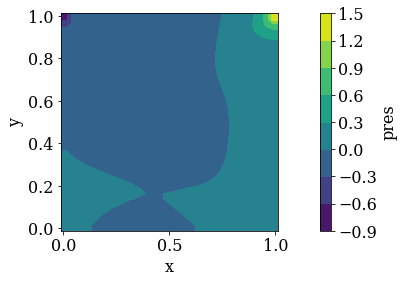

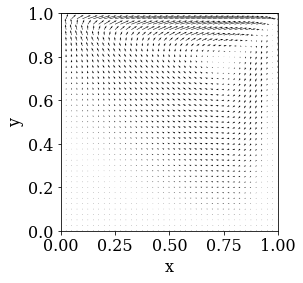

In [4]:
# Plot the analytical solution
mae6225.io.plot_contour(gridc, 'pres')
mae6225.io.plot_vector(gridx,gridy,'velc')